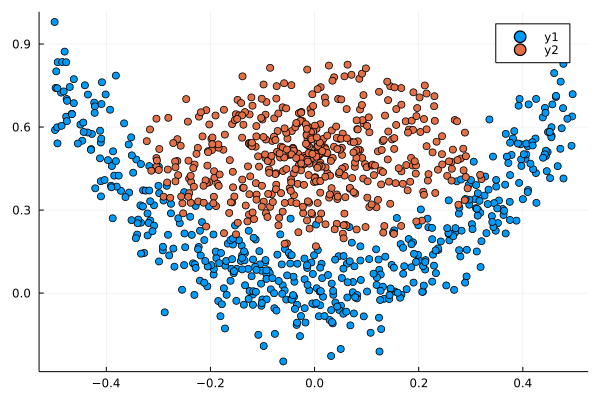

In [1]:
using Plots
using Statistics
#Auxiliary functions for generating our data
function generate_real_data(n)
    x1 = rand(1,n) .- 0.5
    x2 = (x1 .* x1)*3 .+ randn(1,n)*0.1
    return vcat(x1,x2)
end
function generate_fake_data(n)
    θ  = 2*π*rand(1,n)
    r  = rand(1,n)/3
    x1 = @. r*cos(θ)
    x2 = @. r*sin(θ)+0.5
    return vcat(x1,x2)
end
# Creating our data
train_size = 5000
real = generate_real_data(train_size)
fake = generate_fake_data(train_size)
# Visualizing
scatter(real[1,1:500],real[2,1:500])
scatter!(fake[1,1:500],fake[2,1:500])

In [12]:
real

2×5000 Matrix{Float64}:
 0.0621995  -0.118508   0.327732  …  0.459683  -0.489723  -0.456036
 0.106119   -0.0051489  0.421443     0.623433   0.7908     0.606066

In [11]:
size(real), size(fake)

((2, 5000), (2, 5000))

In [4]:
using Flux

In [2]:
function NeuralNetwork()
    return Chain(
            Dense(2, 25,relu),
            Dense(25,1,x->σ.(x))
            )
end

NeuralNetwork (generic function with 1 method)

In [5]:
# Organizing the data in batches
X    = hcat(real,fake)
Y    = vcat(ones(train_size),zeros(train_size))
data = Flux.Data.DataLoader((X, Y'), batchsize=100,shuffle=true);
# Defining our model, optimization algorithm and loss function
m    = NeuralNetwork()
opt = Descent(0.05)
loss(x, y) = sum(Flux.Losses.binarycrossentropy(m(x), y))

loss (generic function with 1 method)

In [17]:
real

2×5000 Matrix{Float64}:
 0.0621995  -0.118508   0.327732  …  0.459683  -0.489723  -0.456036
 0.106119   -0.0051489  0.421443     0.623433   0.7908     0.606066

In [14]:
X

2×10000 Matrix{Float64}:
 0.0621995  -0.118508   0.327732  -0.0840756  …  -0.0276677  -0.000347813
 0.106119   -0.0051489  0.421443   0.0135306      0.317359    0.492678

In [15]:
Y

10000-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [13]:
ps = Flux.params(m)
epochs = 20
for i in 1:epochs
    Flux.train!(loss, ps, data, opt)
end
println(mean(m(real)),mean(m(fake))) # Print model prediction

0.88925181602351820.12668879109452705


In [7]:
m    = NeuralNetwork()
function trainModel!(m,data;epochs=20)
    for epoch = 1:epochs
        for d in data
            gs = gradient(Flux.params(m)) do
                l = loss(d...)
            end
            Flux.update!(opt, Flux.params(m), gs)
        end
    end
    @show mean(m(real)),mean(m(fake))
end
trainModel!(m,data;epochs=20)

(mean(m(real)), mean(m(fake))) = (0.8007920988383206, 0.21180427430953513)


(0.8007920988383206, 0.21180427430953513)

In [9]:
gs = gradient(Flux.params(m)) do
     l = loss(d...)
end
Flux.update!(opt, Flux.params(m), gs)

LoadError: UndefVarError: d not defined

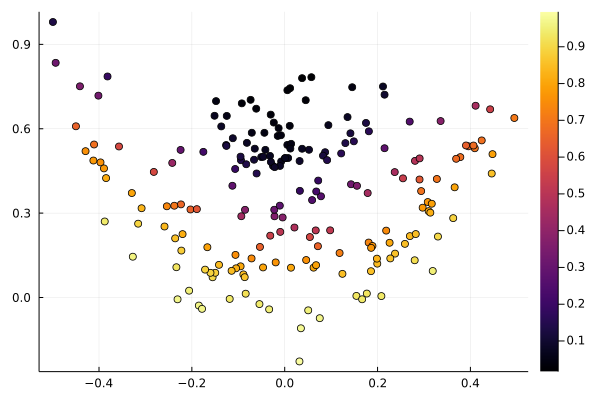

In [10]:
scatter(real[1,1:100],real[2,1:100],zcolor=m(real)')
scatter!(fake[1,1:100],fake[2,1:100],zcolor=m(fake)',legend=false)